In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("osamahosamabdellatif/high-quality-invoice-images-for-ocr")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'high-quality-invoice-images-for-ocr' dataset.
Path to dataset files: /kaggle/input/high-quality-invoice-images-for-ocr


In [2]:
import os

print(os.listdir(path))

batch1_path = os.path.join(path, 'batch_1', 'batch_1')
if os.path.exists(batch1_path):
    print("Fișiere în batch_1:", os.listdir(batch1_path)[:5]) #Arată primele 5 fișiere

['batch_1', 'batch_3', 'batch_2']
Fișiere în batch_1: ['batch1_3.csv', 'batch1_1.csv', 'batch1_2', 'batch1_3', 'batch1_2.csv']


In [3]:
import os
from pathlib import Path

path = "/root/.cache/kagglehub/datasets/osamahosamabdellatif/high-quality-invoice-images-for-ocr/versions/3"

def print_tree(startpath, max_items=5):
    """
    Afișează structura folderelor similar cu comanda 'tree' din Linux.
    """
    startpath = Path(startpath)
    print(f"📍 RĂDĂCINĂ: {startpath.name}")

    for root, dirs, files in os.walk(startpath):
        level = str(root).replace(str(startpath), '').count(os.sep)
        indent = '│   ' * level
        print(f"{indent}├── 📁 {os.path.basename(root)}/")

        subindent = '│   ' * (level + 1)


        for f in files[:max_items]:
            print(f"{subindent}├── 📄 {f}")

        if len(files) > max_items:
            print(f"{subindent}└── ... (încă {len(files) - max_items} fișiere ascunse)")

print("Structura folderului:")
print_tree(path)
print("\n" + "="*50 + "\n")

print("folder batch_1")

batch1_root = os.path.join(path, 'batch_1')

if os.path.exists(batch1_root):
    print(f"Folder gasit: {batch1_root}")
    content = os.listdir(batch1_root)
    print("Primele 5 elemente:", content[:5])


    possible_subfolder = os.path.join(batch1_root, 'batch1_1')
    if os.path.exists(possible_subfolder):
         print(f"\n s-a gasit si subfolderul specific de imagini: {possible_subfolder}")
         print("fisiere inauntru:", os.listdir(possible_subfolder)[:5])
    else:
        print(f"\nℹ Subfolderul 'batch1_1' nu există direct aici. Imaginile ar putea fi în folderele 'batch1_2' sau 'batch1_3' listate mai sus.")
else:
    print(f"Folderul nu există: {batch1_root}")

--- 🌳 STRUCTURA FOLDERELOR 🌳 ---
📍 RĂDĂCINĂ: 3
├── 📁 3/
│   ├── 📁 batch_1/
│   │   ├── 📁 batch_1/
│   │   │   ├── 📄 batch1_1.csv
│   │   │   ├── 📄 batch1_2.csv
│   │   │   ├── 📄 batch1_3.csv
│   │   │   ├── 📁 batch1_1/
│   │   │   │   ├── 📄 batch1-0052.jpg
│   │   │   │   ├── 📄 batch1-0363.jpg
│   │   │   │   ├── 📄 batch1-0067.jpg
│   │   │   │   ├── 📄 batch1-0267.jpg
│   │   │   │   ├── 📄 batch1-0252.jpg
│   │   │   │   └── ... (încă 494 fișiere ascunse)
│   │   │   ├── 📁 batch1_2/
│   │   │   │   ├── 📄 batch1-0534.jpg
│   │   │   │   ├── 📄 batch1-0617.jpg
│   │   │   │   ├── 📄 batch1-0804.jpg
│   │   │   │   ├── 📄 batch1-0644.jpg
│   │   │   │   ├── 📄 batch1-0591.jpg
│   │   │   │   └── ... (încă 496 fișiere ascunse)
│   │   │   ├── 📁 batch1_3/
│   │   │   │   ├── 📄 batch1-1072.jpg
│   │   │   │   ├── 📄 batch1-1433.jpg
│   │   │   │   ├── 📄 batch1-1153.jpg
│   │   │   │   ├── 📄 batch1-1002.jpg
│   │   │   │   ├── 📄 batch1-1310.jpg
│   │   │   │   └── ... (încă 484 fișiere ascunse)
│ 

Smart invoice -extragere date

 NR de imagini:1

sa se afiseze imaginile? (Y/N): Y
Căutare dataset...
Using Colab cache for faster access to the 'high-quality-invoice-images-for-ocr' dataset.
 Am găsit 499 imagini. se vor procesa procesa primele 1.

 incepe procesarea imaginilor...



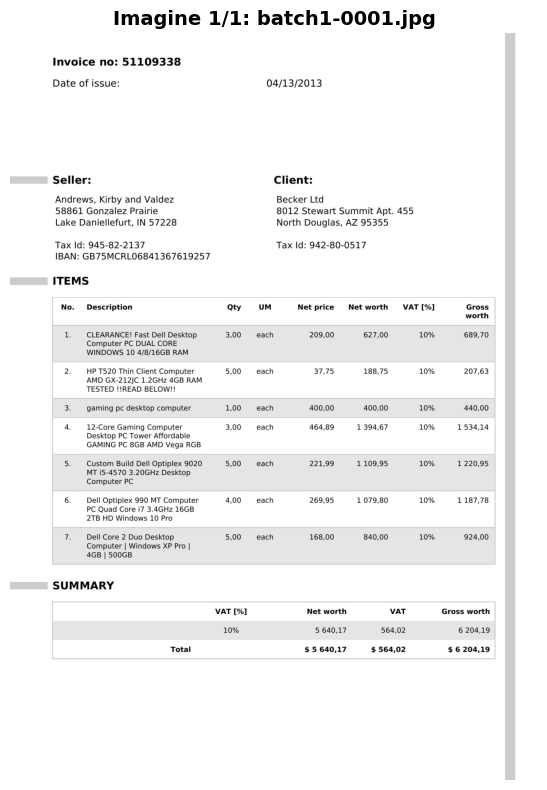

[1/1] Imagine: batch1-0001.jpg... | Status: SUCCESS | Completitudine: 71.43% | Timp: 7.88s

📄 JSON complet pentru singura imagine procesată:
{
  "invoice": {
    "client_name": "Becker Ltd",
    "client_address": "8012 Stewart Summit Apt. 455 North Douglas, AZ 95355",
    "seller_name": "Andrews, Kirby and Valdez",
    "seller_address": "Lake Danielefurt, IN 57228",
    "invoice_number": "51109338",
    "invoice_date": "04/13/2013",
    "due_date": ""
  },
  "items": [
    {
      "description": "CLEARANCE! Dell Desktop Computer w/ FULL COLOR WINDOWS 10 & OFFICE 2013",
      "quantity": "3.00 each",
      "net_price": "209.00",
      "net_worth": "627.00",
      "vat": "6.00%",
      "gross_worth": "689.70"
    },
    {
      "description": "MSI 15.6\" Intel Computer",
      "quantity": "1.00 each",
      "net_price": "207.63",
      "net_worth": "207.63",
      "vat": "6.00%",
      "gross_worth": "220.09"
    },
    {
      "description": "12-Core Gaming Computer",
      "quantity": 

In [2]:
import os
import base64
import json
import kagglehub
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from openai import OpenAI
import time


class InvoiceImageEncoder:
    """Clasa pentru encodarea imaginilor în base64."""

    @staticmethod
    def encode_image(image_path: Path) -> str:
        """Encodare imagine in base64."""
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')


class InvoiceDataExtractor:
    """clasa pentru extragerea datelor din facturi folosind OpenAI."""

    def __init__(self, api_key: str, model_name: str = "gpt-4o-mini"):

        os.environ["OPENAI_API_KEY"] = api_key
        self.client = OpenAI(api_key=api_key)
        self.model_name = model_name

        # partea de prompt engineering
        self.prompt = """
        You are an expert invoice processing AI. Extract the data from this invoice image strictly into the following JSON format.

    REQUIRED JSON STRUCTURE:
    {
        "invoice": {
            "client_name": "Name of client",
            "client_address": "Full address",
            "seller_name": "Name of seller",
            "seller_address": "Full address",
            "invoice_number": "Invoice ID",
            "invoice_date": "Date",
            "due_date": "Due Date"
        },
        "items": [
            {
                "description": "Item description",
                "quantity": "Qty with unit",
                "net_price": "Net price",
                "net_worth": "Line total",
                "vat": "Tax amount/percent",
                "gross_worth": "Gross value"
            }
        ],
        "subtotal": {},
        "payment_instructions": {}
    }
    Return ONLY valid JSON.
        """

    def extract_invoice_data(self, image_path: Path) -> dict:
        """se extrag datele din factura folosind OpenAI API."""
        base64_image = InvoiceImageEncoder.encode_image(image_path)

        try:
            response = self.client.chat.completions.create(
                model=self.model_name,
                response_format={"type": "json_object"},
                messages=[
                    {
                        "role": "user",
                        "content": [
                            {"type": "text", "text": self.prompt},
                            {
                                "type": "image_url",
                                "image_url": {
                                    "url": f"data:image/jpeg;base64,{base64_image}",
                                    "detail": "low"
                                }
                            }
                        ]
                    }
                ],
                temperature=0.1
            )
            return json.loads(response.choices[0].message.content)
        except Exception as e:
            print(f"Eroare la extragere pentru {image_path.name}: {e}")
            return None


class CompletenessScorer:
    """Clasa pentru calcularea scorului de completitudine al datelor extrase."""

    @staticmethod
    def calculate_score(data: dict) -> float:
        """
        Calculează un scor  pe cate campuri cheie
        au fost completate (nu sunt null sau N/A).
        """
        if not data or 'invoice' not in data:
            return 0.0

        invoice = data.get('invoice', {})
        fields_to_check = [
            'client_name', 'seller_name', 'invoice_number',
            'invoice_date', 'due_date', 'total_amount'
        ]

        found = 0
        for field in fields_to_check:
            val = invoice.get(field)

            if val and str(val).lower() not in ["n/a", "null", "none", ""]:
                found += 1

        # Verific dacă exista itemi
        items = data.get('items', [])
        if items and len(items) > 0:
            found += 1  # Bonus pentru găsirea liniilor din factură

        total_checks = len(fields_to_check) + 1
        return round((found / total_checks) * 100, 2)


class DatasetLoader:
    """Clasă pentru încărcarea dataset-ului de imagini."""

    @staticmethod
    def load_dataset(dataset_name: str) -> Path:
        """Descarcă și returnează calea către dataset."""
        print("Căutare dataset...")
        try:
            path = kagglehub.dataset_download(dataset_name)
            return Path(path)
        except Exception as e:
            print(f"Eroare la download dataset: {e}")
            raise

    @staticmethod
    def find_image_folder(base_dir: Path) -> Path:
        """Găsește folderul cu imagini în structura dataset-ului."""
        for root, dirs, files in os.walk(base_dir):
            if "batch1_1" in dirs:
                return Path(root) / "batch1_1"
            if any(f.endswith(".jpg") for f in files):
                return Path(root)

        raise FileNotFoundError("Nu am găsit folderul cu imagini.")

    @staticmethod
    def get_images(image_folder: Path, num_images: int) -> list:
        """Returnează lista de imagini de procesat."""
        all_files = sorted(list(image_folder.glob("*.jpg")))
        target_files = all_files[:num_images]

        print(f" Am găsit {len(all_files)} imagini. se vor procesa procesa primele {len(target_files)}.")
        return target_files


class ImageDisplayManager:
    """Clasă pentru gestionarea afișării imaginilor."""

    @staticmethod
    def display_image(image_path: Path, index: int, total: int):
        """Afișează o imagine în output."""
        img = Image.open(image_path)
        plt.figure(figsize=(12, 8))
        plt.imshow(img)
        plt.title(f"Imagine {index + 1}/{total}: {image_path.name}", fontsize=14, fontweight='bold')
        plt.axis("off")
        plt.tight_layout()
        plt.show()


class InvoiceProcessor:
    """Clasa principala pentru procesarea facturilor."""

    def __init__(self, api_key: str, model_name: str = "gpt-4o-mini"):

        self.extractor = InvoiceDataExtractor(api_key, model_name)
        self.scorer = CompletenessScorer()
        self.display_manager = ImageDisplayManager()
        self.results = []

    def process_images(
        self,
        image_paths: list,
        display_images: bool = False
    ) -> list:
        """Procesează lista de imagini și returnează rezultatele."""
        self.results = []

        print("\n incepe procesarea imaginilor...\n")

        for index, img_path in enumerate(image_paths):
            start_time = time.time()

            if display_images:
                self.display_manager.display_image(img_path, index, len(image_paths))

            extracted_data = self.extractor.extract_invoice_data(img_path)
            completeness = self.scorer.calculate_score(extracted_data)
            status = "SUCCESS" if extracted_data else "FAILED"

            record = {
                "file_name": img_path.name,
                "extraction_status": status,
                "completeness_score_percent": completeness,
                "extracted_data": extracted_data
            }
            self.results.append(record)

            elapsed_time = time.time() - start_time
            print(f"[{index+1}/{len(image_paths)}] Imagine: {img_path.name[:30]}... | "
                  f"Status: {status} | Completitudine: {completeness}% | "
                  f"Timp: {elapsed_time:.2f}s")

        # Dacă e o singură imagine, afișăm JSON-ul în output
        if len(self.results) == 1:
            print("\n📄 JSON complet pentru singura imagine procesată:")
            try:
                print(json.dumps(self.results[0]["extracted_data"], indent=2, ensure_ascii=False))
            except Exception:
                print(self.results[0]["extracted_data"])

        print(f"\nProcesare completă! {len(self.results)} imagini procesate.")
        return self.results

    def save_results(self, output_filename: str) -> str:
        """
        Salvează rezultatele în fișier JSON.

        Args:
            output_filename: Numele fișierului de output

        Returns:
            Calea către fișierul salvat
        """
        output_path = Path(output_filename)

        print(f"\n💾 Salvare date în {output_filename}...")
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(self.results, f, indent=4, ensure_ascii=False)

        print(f"Fișierul '{output_filename}' a fost creat cu succes.")
        return str(output_path.absolute())

    def download_file(self, file_path: str):

        try:
            from google.colab import files
            files.download(file_path)
            print(" Se inițiază descărcarea...")
        except ImportError:
            print(f" Fișierul este salvat local: {os.path.abspath(file_path)}")


class UserInterface:
    """Clasa pentru interacțiunea cu utilizatorul."""

    @staticmethod
    def get_number_of_images() -> int:
        """Solicită numărul de imagini de procesat."""
        while True:
            try:
                num = int(input("\n NR de imagini:"))
                if num > 0:
                    return num
                else:
                    print("nr >0")
            except ValueError:
                print("trebuie sa fie un nr valid")

    @staticmethod
    def ask_display_images() -> bool:
        """Întreabă dacă utilizatorul dorește să afișeze imaginile."""
        while True:
            response = input("\nsa se afiseze imaginile? (Y/N): ").lower().strip()
            if response in ['da', 'd', 'yes', 'y', 'Y']:
                return True
            elif response in ['nu', 'n', 'no', 'N']:
                return False
            else:
                print("raspunde cu Y/N, da/nu.")

    @staticmethod
    def ask_download_json() -> bool:
        """intreabă dacă utilizatorul doreste să descarce JSON-ul."""
        while True:
            response = input("\n sa descarc? (y/n): ").lower().strip()
            if response in ['da', 'd', 'yes', 'y', 'Y']:
                return True
            elif response in ['nu', 'n', 'no','N']:
                return False
            else:
                print("introdu raspuns corect")


def main():
    from google.colab import userdata

    API_KEY = userdata.get('OPENAI_API_KEY')
    DATASET_NAME = "osamahosamabdellatif/high-quality-invoice-images-for-ocr"
    OUTPUT_FILENAME = "dataset_facturi_output.json"


    print("Smart invoice -extragere date")

    ui = UserInterface()

    num_images = ui.get_number_of_images()

    display_images = ui.ask_display_images()


    loader = DatasetLoader()
    base_dir = loader.load_dataset(DATASET_NAME)
    image_folder = loader.find_image_folder(base_dir)
    image_paths = loader.get_images(image_folder, num_images)

    processor = InvoiceProcessor(API_KEY)
    results = processor.process_images(image_paths, display_images=display_images)


    saved_path = processor.save_results(OUTPUT_FILENAME)


    download_json = ui.ask_download_json()
    if download_json:
        processor.download_file(saved_path)


    print(" PROCES COMPLET!")



if __name__ == "__main__":
    main()

In [3]:

if __name__ == "__main__":
    main()

Smart invoice -extragere date

 NR de imagini:100

sa se afiseze imaginile? (Y/N): n
Căutare dataset...
Using Colab cache for faster access to the 'high-quality-invoice-images-for-ocr' dataset.
 Am găsit 499 imagini. se vor procesa procesa primele 100.

 incepe procesarea imaginilor...

[1/100] Imagine: batch1-0001.jpg... | Status: SUCCESS | Completitudine: 71.43% | Timp: 9.66s
[2/100] Imagine: batch1-0002.jpg... | Status: SUCCESS | Completitudine: 71.43% | Timp: 7.65s
[3/100] Imagine: batch1-0003.jpg... | Status: SUCCESS | Completitudine: 71.43% | Timp: 8.47s
[4/100] Imagine: batch1-0004.jpg... | Status: SUCCESS | Completitudine: 71.43% | Timp: 11.77s
Eroare la extragere pentru batch1-0005.jpg: Expecting ',' delimiter: line 37 column 16110 (char 17226)
[5/100] Imagine: batch1-0005.jpg... | Status: FAILED | Completitudine: 0.0% | Timp: 327.89s
[6/100] Imagine: batch1-0006.jpg... | Status: SUCCESS | Completitudine: 71.43% | Timp: 8.73s
[7/100] Imagine: batch1-0007.jpg... | Status: SUCCE

In [2]:
import json
import pandas as pd
import numpy as np
from typing import Dict, List, Any, Optional
from datetime import datetime
from IPython.display import display, HTML
class InvoiceDataValidator:
    """Clasa pentru validare si curatare a datelor extrase din facturi."""

    def __init__(self, extracted_data: Dict[str, Any]):
        """
        Inițializează validatorul cu datele extrase.

        Args:
            extracted_data: Dicționar cu datele extrase (structura din InvoiceProcessor)
        """
        self.raw_data = extracted_data
        self.cleaned_data = None
        self.validation_errors = []
        self.validation_warnings = []

    def validate(self) -> bool:
        """
        Validează structura și conținutul datelor.

        Returns:
            True dacă datele sunt valide, False altfel
        """
        self.validation_errors = []
        self.validation_warnings = []

        if not self.raw_data:
            self.validation_errors.append("Datele extrase sunt goale sau None")
            return False

        # Verifică dacă extragerea a eșuat
        if self.raw_data.get('extraction_status') == 'FAILED':
            self.validation_errors.append("Extragerea datelor a eșuat (status: FAILED)")
            return False

        # Verifică structura de bază
        if 'extracted_data' not in self.raw_data:
            self.validation_errors.append("Lipsește câmpul 'extracted_data'")
            return False

        data = self.raw_data.get('extracted_data')

        # Verifică dacă extracted_data este None
        if data is None:
            self.validation_errors.append("'extracted_data' este None (extragere eșuată)")
            return False

        if not isinstance(data, dict):
            self.validation_errors.append("'extracted_data' trebuie să fie un dicționar")
            return False

        # Validează secțiunea invoice
        if 'invoice' not in data:
            self.validation_warnings.append("Lipsește secțiunea 'invoice'")
        else:
            self._validate_invoice(data.get('invoice', {}))

        # Validează items
        if 'items' not in data:
            self.validation_warnings.append("Lipseste secțiunea 'items'")
        else:
            self._validate_items(data.get('items', []))

        return len(self.validation_errors) == 0

    def _validate_invoice(self, invoice: Dict[str, Any]):
        """Validează secțiunea invoice."""
        required_fields = ['client_name', 'seller_name', 'invoice_number']

        for field in required_fields:
            if field not in invoice or not invoice[field]:
                self.validation_warnings.append(f"Lipsește sau este gol câmpul 'invoice.{field}'")

        # Validează datele
        if 'invoice_date' in invoice and invoice['invoice_date']:
            if not self._is_valid_date(invoice['invoice_date']):
                self.validation_warnings.append(f"Format dată invalid pentru 'invoice_date': {invoice['invoice_date']}")

        if 'due_date' in invoice and invoice['due_date']:
            if not self._is_valid_date(invoice['due_date']):
                self.validation_warnings.append(f"Format dată invalid pentru 'due_date': {invoice['due_date']}")

        # Validează câmpuri numerice
        numeric_fields = ['total_amount', 'net_price', 'net_worth', 'gross_worth']
        for field in numeric_fields:
            if field in invoice and invoice[field]:
                if not self._is_valid_number(invoice[field]):
                    self.validation_warnings.append(f"Format numeric invalid pentru '{field}': {invoice[field]}")

        # Validează VAT (poate fi procent sau număr)
        if 'vat' in invoice and invoice['vat']:
            vat_value = str(invoice['vat']).strip()
            # Poate fi procent (ex: "10%") sau număr
            if not (vat_value.endswith('%') or self._is_valid_number(vat_value)):
                self.validation_warnings.append(f"Format invalid pentru 'vat': {invoice['vat']}")

    def _validate_items(self, items: List[Dict[str, Any]]):
        """Validează lista de items."""
        if not isinstance(items, list):
            self.validation_errors.append("'items' trebuie să fie o listă")
            return

        for idx, item in enumerate(items):
            if not isinstance(item, dict):
                self.validation_warnings.append(f"Item {idx} nu este un dicționar valid")
                continue

            # Verifică câmpuri importante
            if 'description' not in item or not item['description']:
                self.validation_warnings.append(f"Item {idx}: lipsește 'description'")

            # Validează prețuri
            for price_field in ['price', 'total']:
                if price_field in item and item[price_field]:
                    if not self._is_valid_number(item[price_field]):
                        self.validation_warnings.append(f"Item {idx}: format numeric invalid pentru '{price_field}'")

    def _is_valid_date(self, date_str: str) -> bool:
        """Verifică dacă un string este o dată validă."""
        if not date_str or date_str.lower() in ['null', 'none', 'n/a', '']:
            return False

        # Încearcă să parseze diferite formate de dată
        date_formats = [
            '%Y-%m-%d',
            '%d/%m/%Y',
            '%m/%d/%Y',
            '%d-%m-%Y',
            '%Y/%m/%d',
            '%d.%m.%Y',
            '%m.%d.%Y'
        ]

        for fmt in date_formats:
            try:
                datetime.strptime(date_str.strip(), fmt)
                return True
            except:
                continue

        return False

    def _is_valid_number(self, num_str: str) -> bool:
        """Verifică dacă un string este un număr valid."""
        if not num_str or num_str.lower() in ['null', 'none', 'n/a', '']:
            return False

        # Elimină simboluri de monedă și spații
        cleaned = re.sub(r'[^\d.,-]', '', str(num_str).strip())

        try:
            # Încearcă să convertească la float
            cleaned = cleaned.replace(',', '.')
            float(cleaned)
            return True
        except:
            return False

    def clean(self) -> Dict[str, Any]:
        """
        Curăță și normalizează datele extrase.

        Returns:
            Dicționar cu datele curățate
        """
        # Verifică dacă extragerea a eșuat sau datele sunt None
        if not self.raw_data:
            return None

        # Exclude înregistrările cu status FAILED sau extracted_data None
        if self.raw_data.get('extraction_status') == 'FAILED':
            return None

        if 'extracted_data' not in self.raw_data:
            return None

        data = self.raw_data.get('extracted_data')

        # Verifică dacă extracted_data este None
        if data is None:
            return None

        # Verifică dacă e dicționar valid
        if not isinstance(data, dict):
            return None

        # Face o copie sigură
        try:
            data = data.copy()
        except AttributeError:
            # Dacă nu poate face copy, încercă să creeze un nou dict
            data = dict(data) if data else {}

        # Curăță secțiunea invoice (păstrează TOATE câmpurile)
        if 'invoice' in data:
            data['invoice'] = self._clean_invoice(data['invoice'])

        # Curăță items
        if 'items' in data:
            data['items'] = self._clean_items(data['items'])

        # Curăță subtotal dacă există (păstrează toate câmpurile)
        if 'subtotal' in data:
            data['subtotal'] = self._clean_subtotal(data['subtotal'])

        # Creează structura finală curățată
        self.cleaned_data = {
            "file_name": self.raw_data.get('file_name', ''),
            "extraction_status": self.raw_data.get('extraction_status', 'UNKNOWN'),
            "completeness_score_percent": self.raw_data.get('completeness_score_percent', 0.0),
            "extracted_data": data,
            "validation_errors": self.validation_errors,
            "validation_warnings": self.validation_warnings,
            "is_valid": len(self.validation_errors) == 0
        }

        return self.cleaned_data

    def _clean_invoice(self, invoice: Dict[str, Any]) -> Dict[str, Any]:
        """Curăță și normalizează datele din secțiunea invoice - PĂSTREAZĂ TOATE CÂMPURILE."""
        if not invoice or not isinstance(invoice, dict):
            return {}

        cleaned = {}

        # Procesează TOATE câmpurile din invoice, nu doar cele enumerate
        for key, value in invoice.items():
            if value is None:
                continue

            # Câmpuri text - curăță
            text_fields = ['client_name', 'client_address', 'seller_name', 'seller_address', 'invoice_number']
            if key in text_fields:
                cleaned[key] = self._clean_text(value)

            # Câmpuri date - normalizează
            elif key in ['invoice_date', 'due_date']:
                cleaned[key] = self._normalize_date(value)

            # Câmpuri numerice - normalizează
            elif key in ['total_amount', 'net_price', 'net_worth', 'gross_worth']:
                cleaned[key] = self._normalize_number(value)

            # VAT - păstrează formatul (poate fi "10%" sau număr)
            elif key == 'vat':
                cleaned[key] = self._clean_vat(value)

            # Alte câmpuri - păstrează și curăță textul dacă e string
            else:
                if isinstance(value, str):
                    cleaned[key] = self._clean_text(value)
                else:
                    cleaned[key] = value

        return cleaned

    def _clean_subtotal(self, subtotal: Dict[str, Any]) -> Dict[str, Any]:
        """Curăță și normalizează datele din secțiunea subtotal - PĂSTREAZĂ TOATE CÂMPURILE."""
        if not subtotal or not isinstance(subtotal, dict):
            return {}

        cleaned = {}

        # Procesează TOATE câmpurile din subtotal
        for key, value in subtotal.items():
            if value is None:
                continue

            # Câmpuri numerice - normalizează
            if key in ['tax', 'discount', 'total', 'subtotal', 'net_price', 'net_worth', 'gross_worth']:
                cleaned[key] = self._normalize_number(value)

            # VAT - păstrează formatul
            elif key == 'vat':
                cleaned[key] = self._clean_vat(value)

            # Alte câmpuri - păstrează și curăță textul dacă e string
            else:
                if isinstance(value, str):
                    cleaned[key] = self._clean_text(value)
                else:
                    cleaned[key] = value

        return cleaned

    def _clean_vat(self, vat_value: Any) -> str:
        """Curăță și normalizează valoarea VAT (poate fi procent sau număr)."""
        if not vat_value:
            return ""

        vat_str = str(vat_value).strip()

        if vat_str.lower() in ['null', 'none', 'n/a', '']:
            return ""

        # Dacă e deja procent (ex: "10%"), păstrează formatul
        if vat_str.endswith('%'):
            # Curăță și normalizează procentul
            try:
                percent_value = float(vat_str.replace('%', '').strip())
                return f"{percent_value}%"
            except:
                return vat_str

        # Dacă e număr, normalizează
        return self._normalize_number(vat_value)

    def _clean_items(self, items: List[Dict[str, Any]]) -> List[Dict[str, Any]]:
        """Curăță și normalizează lista de items."""
        if not items or not isinstance(items, list):
            return []

        cleaned_items = []

        for item in items:
            if not isinstance(item, dict):
                continue

            cleaned_item = {}

            # Procesează TOATE câmpurile din item
            for key, value in item.items():
                if value is None:
                    continue

                # Description - curăță textul
                if key == 'description':
                    cleaned_item[key] = self._clean_text(value)

                # Câmpuri numerice - normalizează
                elif key in ['quantity', 'price', 'total', 'unit_price']:
                    cleaned_item[key] = self._normalize_number(value)

                # Alte câmpuri - păstrează și curăță textul dacă e string
                else:
                    if isinstance(value, str):
                        cleaned_item[key] = self._clean_text(value)
                    else:
                        cleaned_item[key] = value

            if cleaned_item:  # Adaugă doar dacă are conținut
                cleaned_items.append(cleaned_item)

        return cleaned_items

    def _clean_text(self, text: Any) -> str:
        """Curăță textul de spații și caractere invalide."""
        if not text:
            return ""

        text_str = str(text).strip()

        # Elimină valori invalide
        if text_str.lower() in ['null', 'none', 'n/a', 'na', '']:
            return ""

        # Elimină spații multiple
        text_str = re.sub(r'\s+', ' ', text_str)

        # Elimină caractere de control
        text_str = re.sub(r'[\x00-\x1f\x7f-\x9f]', '', text_str)

        return text_str

    def _normalize_date(self, date_str: str) -> str:
        """Normalizează data într-un format standard (YYYY-MM-DD)."""
        if not date_str or date_str.lower() in ['null', 'none', 'n/a', '']:
            return ""

        date_str = str(date_str).strip()

        # Formate de dată comune
        date_formats = [
            ('%Y-%m-%d', '%Y-%m-%d'),
            ('%d/%m/%Y', '%Y-%m-%d'),
            ('%m/%d/%Y', '%Y-%m-%d'),
            ('%d-%m-%Y', '%Y-%m-%d'),
            ('%Y/%m/%d', '%Y-%m-%d'),
            ('%d.%m.%Y', '%Y-%m-%d'),
            ('%m.%d.%Y', '%Y-%m-%d'),
        ]

        for input_fmt, output_fmt in date_formats:
            try:
                dt = datetime.strptime(date_str, input_fmt)
                return dt.strftime('%Y-%m-%d')
            except:
                continue

        # Dacă nu s-a putut parse, returnează originalul curățat
        return self._clean_text(date_str)

    def _normalize_number(self, num_str: Any) -> str:
        """Normalizează un număr într-un format standard."""
        if not num_str:
            return ""

        num_str = str(num_str).strip()

        if num_str.lower() in ['null', 'none', 'n/a', '']:
            return ""

        # Elimină simboluri de monedă și spații
        cleaned = re.sub(r'[^\d.,-]', '', num_str)

        # Înlocuiește virgula cu punct pentru format standard
        cleaned = cleaned.replace(',', '.')

        # Verifică dacă e număr valid
        try:
            num = float(cleaned)
            # Formatează cu 2 zecimale
            return f"{num:.2f}"
        except:
            return cleaned

    def get_validation_report(self) -> str:
        """
        Returnează un raport de validare.

        Returns:
            String cu raportul de validare
        """
        report = []
        report.append("="*80)
        report.append(" RAPORT VALIDARE ȘI CURĂȚARE DATE")
        report.append("="*80)

        report.append(f"\n Fișier: {self.raw_data.get('file_name', 'N/A')}")
        report.append(f" Status extragere: {self.raw_data.get('extraction_status', 'N/A')}")
        report.append(f" Scor completitudine: {self.raw_data.get('completeness_score_percent', 0)}%")

        if self.validation_errors:
            report.append(f"\n Erori de validare ({len(self.validation_errors)}):")
            for error in self.validation_errors:
                report.append(f"   • {error}")
        else:
            report.append("\n Nu există erori de validare")

        if self.validation_warnings:
            report.append(f"\n  Avertismente ({len(self.validation_warnings)}):")
            for warning in self.validation_warnings:
                report.append(f"   • {warning}")
        else:
            report.append("\n Nu există avertismente")

        report.append(f"\n{' Date valide' if len(self.validation_errors) == 0 else '❌ Date invalide'}")
        report.append("="*80)

        return "\n".join(report)

    def get_cleaned_json(self) -> str:
        """
        Returnează JSON-ul curățat ca string formatat.

        Returns:
            String JSON formatat
        """
        if self.cleaned_data is None:
            self.clean()

        if self.cleaned_data is None:
            return json.dumps({"error": "Nu s-au putut curăța datele"}, indent=2, ensure_ascii=False)

        return json.dumps(self.cleaned_data, indent=2, ensure_ascii=False)

In [3]:
import json
import re
INPUT_JSON = "dataset_facturi_output.json"
OUTPUT_JSON_CLEAN = "dataset_facturi_output_clean.json"

# 1. Încarcă dataset-ul original
with open(INPUT_JSON, "r", encoding="utf-8") as f:
    results = json.load(f)
print(f"Am încărcat {len(results)} înregistrări din {INPUT_JSON}")

cleaned_results = []
failed_count = 0
skipped_count = 0

# 2. Procesează fiecare înregistrare
for idx, record in enumerate(results):
    file_name = record.get('file_name', 'N/A')
    status = record.get('extraction_status', 'UNKNOWN')

    # Exclude înregistrările cu status FAILED
    if status == 'FAILED':
        print(f"\nSKIP înregistrare {idx+1}/{len(results)}: {file_name} (Status: FAILED)")
        skipped_count += 1
        continue


    print(f"Procesare înregistrare {idx+1}/{len(results)}: {file_name}")


    validator = InvoiceDataValidator(record)

    # Validare
    is_valid = validator.validate()

    # Curățare (returnează None dacă eșuează)
    cleaned = validator.clean()

    # Adaugă doar dacă curățarea a reușit
    if cleaned is not None:
        cleaned_results.append(cleaned)
        #print(validator.get_validation_report())
        #print("\n JSON CURĂȚAT:")
        #print(validator.get_cleaned_json())
    else:
        print(f"Nu s-au putut curăța datele pentru {file_name}")
        failed_count += 1

# 3. Salvează doar înregistrările curățate cu succes
with open(OUTPUT_JSON_CLEAN, "w", encoding="utf-8") as f:
    json.dump(cleaned_results, f, indent=2, ensure_ascii=False)


print(f" PROCES COMPLET!")

print(f" Statistici:")
print(f"   • Total înregistrări procesate: {len(results)}")
print(f"   • Înregistrări curățate cu succes: {len(cleaned_results)}")
print(f"   • Înregistrări FAILED (excluse): {skipped_count}")
print(f"   • Înregistrări care nu s-au putut curăța: {failed_count}")
print(f"\nDataset curățat salvat în: {OUTPUT_JSON_CLEAN}")
print(f"   ({len(cleaned_results)} înregistrări valide)")

Am încărcat 100 înregistrări din dataset_facturi_output.json
Procesare înregistrare 1/100: batch1-0001.jpg
Procesare înregistrare 2/100: batch1-0002.jpg
Procesare înregistrare 3/100: batch1-0003.jpg
Procesare înregistrare 4/100: batch1-0004.jpg

SKIP înregistrare 5/100: batch1-0005.jpg (Status: FAILED)
Procesare înregistrare 6/100: batch1-0006.jpg
Procesare înregistrare 7/100: batch1-0007.jpg
Procesare înregistrare 8/100: batch1-0008.jpg
Procesare înregistrare 9/100: batch1-0009.jpg
Procesare înregistrare 10/100: batch1-0010.jpg
Procesare înregistrare 11/100: batch1-0011.jpg
Procesare înregistrare 12/100: batch1-0012.jpg
Procesare înregistrare 13/100: batch1-0013.jpg
Procesare înregistrare 14/100: batch1-0014.jpg
Procesare înregistrare 15/100: batch1-0015.jpg
Procesare înregistrare 16/100: batch1-0016.jpg
Procesare înregistrare 17/100: batch1-0017.jpg
Procesare înregistrare 18/100: batch1-0018.jpg
Procesare înregistrare 19/100: batch1-0019.jpg
Procesare înregistrare 20/100: batch1-0020

In [8]:
import json
import pandas as pd
import numpy as np
from typing import Dict, List, Any, Optional
from datetime import datetime
from IPython.display import display, HTML


class MLDatasetBuilder:
    """Clasă pentru construirea dataset-ului final ML-ready."""

    # Coloane de exclus din dataset
    COLUMNS_TO_EXCLUDE = [
        'net_price',
        'net_worth',
        'gross_worth',
        'avg_item_price',
        'max_item_price',
        'min_item_price',
        'items_description_length',
        'subtotal_net_price',
        'subtotal_net_worth',
        'subtotal_gross_worth',
        'discount_rate',
        'total_difference',
        'invoice_weekday',
        'days_until_due',
        #'total_amount',
        'vat_percent',
        'vat_amount',
        'currency',
        'num_items'
    ]

    def __init__(self, input_json: str = "dataset_facturi_clean.json"):
        """
        Inițializează builder-ul cu fișierul de input.

        Args:
            input_json: Calea către fișierul JSON cu datele curățate
        """
        self.input_json = input_json
        self.raw_data = None
        self.ml_dataset = None
        self.feature_stats = {}

    def load_data(self) -> List[Dict[str, Any]]:
        """Încarcă datele din fișierul JSON."""
        print(f" Încărcare date din {self.input_json}...")
        with open(self.input_json, "r", encoding="utf-8") as f:
            self.raw_data = json.load(f)
        print(f" Am încărcat {len(self.raw_data)} înregistrări")
        return self.raw_data

    def extract_features(self, record: Dict[str, Any]) -> Dict[str, Any]:
        """
        Extrage features ML-ready dintr-o înregistrare.

        Args:
            record: O înregistrare din dataset

        Returns:
            Dicționar cu features extrase
        """
        features = {}

        # Metadata de bază
        features['file_name'] = record.get('file_name', '')
        features['extraction_status'] = record.get('extraction_status', 'UNKNOWN')
        features['completeness_score'] = record.get('completeness_score_percent', 0.0)
        features['is_valid'] = record.get('is_valid', False)

        extracted_data = record.get('extracted_data', {})
        invoice = extracted_data.get('invoice', {})
        items = extracted_data.get('items', [])
        subtotal = extracted_data.get('subtotal', {})

        # ========== FEATURES DIN INVOICE ==========
        features['client_name'] = invoice.get('client_name', '')
        features['client_address'] = invoice.get('client_address', '')
        features['seller_name'] = invoice.get('seller_name', '')
        features['seller_address'] = invoice.get('seller_address', '')
        features['invoice_number'] = invoice.get('invoice_number', '')
        features['invoice_date'] = invoice.get('invoice_date', '')
        features['due_date'] = invoice.get('due_date', '')

        # Features numerice din invoice
        features['total_amount'] = self._safe_float(invoice.get('total_amount', '0.00'))

        # VAT din invoice (dacă există)
        vat_str = invoice.get('vat', '')
        features['vat_percent'] = self._extract_vat_percent(vat_str)
        features['vat_amount'] = self._safe_float(invoice.get('vat_amount', '0.00'))

        # Currency
        features['currency'] = invoice.get('currency', 'USD')

        # ========== FEATURES DIN ITEMS ==========
        features['num_items'] = len(items) if items else 0

        # Calculează sume din items (folosind structura reală: net_price, net_worth, gross_worth)
        total_quantity = 0.0
        total_net_price = 0.0
        total_net_worth = 0.0
        total_gross_worth = 0.0
        vat_percents = []

        for item in items:
            # Quantity
            qty = self._safe_float(item.get('quantity', '0.00'))
            total_quantity += qty

            # Net price și net worth
            net_price = self._safe_float(item.get('net_price', '0.00'))
            net_worth = self._safe_float(item.get('net_worth', '0.00'))
            gross_worth = self._safe_float(item.get('gross_worth', '0.00'))

            total_net_price += net_price
            total_net_worth += net_worth
            total_gross_worth += gross_worth

            # Extrage VAT din items (dacă există)
            item_vat = item.get('vat', '')
            if item_vat:
                vat_pct = self._extract_vat_percent(item_vat)
                if vat_pct is not None:
                    vat_percents.append(vat_pct)

        features['total_items_quantity'] = total_quantity
        features['total_items_net_price'] = total_net_price
        features['total_items_net_worth'] = total_net_worth
        features['total_items_gross_worth'] = total_gross_worth

        # Folosește gross_worth pentru calculele standard (sau net_worth dacă nu există)
        total_items_price = total_gross_worth if total_gross_worth > 0 else total_net_worth
        features['total_items_price'] = total_items_price

        # VAT percent din items (media dacă sunt multiple valori)
        if vat_percents:
            features['vat_percent'] = sum(vat_percents) / len(vat_percents)
        elif not features['vat_percent']:
            features['vat_percent'] = None

        # Items descriptions (concatenate pentru text analysis)
        item_descriptions = [item.get('description', '') for item in items if item.get('description')]
        features['items_description_text'] = ' | '.join(item_descriptions)

        # ========== FEATURES DIN SUBTOTAL (structura reală) ==========
        # Structura reală: net_total, vat_total, gross_total (nu subtotal, tax, discount, total)
        features['subtotal_net_total'] = self._safe_float(subtotal.get('net_total', '0.00'))
        features['subtotal_vat_total'] = self._safe_float(subtotal.get('vat_total', '0.00'))
        features['subtotal_gross_total'] = self._safe_float(subtotal.get('gross_total', '0.00'))

        # Compatibilitate cu formatul vechi (dacă există)
        features['subtotal_amount'] = self._safe_float(subtotal.get('subtotal', '0.00')) or features['subtotal_net_total']
        features['tax_amount'] = self._safe_float(subtotal.get('tax', '0.00')) or features['subtotal_vat_total']
        features['discount_amount'] = self._safe_float(subtotal.get('discount', '0.00'))
        features['subtotal_total'] = self._safe_float(subtotal.get('total', '0.00')) or features['subtotal_gross_total']

        # VAT din subtotal (dacă există)
        subtotal_vat = subtotal.get('vat', '')
        if subtotal_vat and not features['vat_percent']:
            features['vat_percent'] = self._extract_vat_percent(subtotal_vat)

        # ========== FEATURES DERIVATE (CALCULATE) ==========
        # Calculează tax_rate
        total_for_calc = features['subtotal_gross_total'] or features['total_amount'] or features['total_items_gross_worth']

        if total_for_calc > 0:
            features['tax_rate'] = (features['subtotal_vat_total'] / total_for_calc) * 100
        else:
            features['tax_rate'] = 0.0

        # Verificări de consistență
        features['has_invoice_date'] = 1 if features['invoice_date'] else 0
        features['has_due_date'] = 1 if features['due_date'] else 0
        features['has_client_info'] = 1 if (features['client_name'] or features['client_address']) else 0
        features['has_seller_info'] = 1 if (features['seller_name'] or features['seller_address']) else 0
        features['has_items'] = 1 if features['num_items'] > 0 else 0

        # Date features (dacă există invoice_date)
        if features['invoice_date']:
            try:
                invoice_dt = datetime.strptime(features['invoice_date'], '%Y-%m-%d')
                features['invoice_year'] = invoice_dt.year
                features['invoice_month'] = invoice_dt.month
                features['invoice_day'] = invoice_dt.day
            except Exception as e:
                # Dacă parsing-ul eșuează, setează None
                features['invoice_year'] = None
                features['invoice_month'] = None
                features['invoice_day'] = None
        else:
            features['invoice_year'] = None
            features['invoice_month'] = None
            features['invoice_day'] = None

        return features

    def _safe_float(self, value: Any) -> float:
        """Convertește o valoare la float în siguranță."""
        if value is None:
            return 0.0

        if isinstance(value, (int, float)):
            return float(value)

        if isinstance(value, str):
            # Elimină simboluri de monedă și spații
            cleaned = value.replace(',', '').replace('$', '').replace('€', '').replace('£', '').strip()
            try:
                return float(cleaned)
            except:
                return 0.0

        return 0.0

    def _extract_vat_percent(self, vat_str: Any) -> Optional[float]:
        """Extrage procentul VAT dintr-un string (ex: "10%" -> 10.0)."""
        if not vat_str:
            return None

        vat_str = str(vat_str).strip()

        if vat_str.endswith('%'):
            try:
                return float(vat_str.replace('%', '').strip())
            except:
                return None

        try:
            return float(vat_str)
        except:
            return None

    def build_dataset(self) -> pd.DataFrame:
        """
        Construiește dataset-ul ML-ready ca DataFrame.

        Returns:
            DataFrame cu features extrase
        """
        if not self.raw_data:
            self.load_data()

        print(f"\n🔧 Extragere features din {len(self.raw_data)} înregistrări...")

        features_list = []

        for idx, record in enumerate(self.raw_data):
            try:
                features = self.extract_features(record)
                features_list.append(features)

                if (idx + 1) % 10 == 0:
                    print(f"   Procesat {idx + 1}/{len(self.raw_data)} înregistrări...")
            except Exception as e:
                print(f"⚠️  Eroare la procesarea înregistrării {idx + 1}: {e}")
                continue

        # Creează DataFrame
        self.ml_dataset = pd.DataFrame(features_list)

        # Exclude coloanele specificate
        columns_to_drop = [col for col in self.COLUMNS_TO_EXCLUDE if col in self.ml_dataset.columns]
        if columns_to_drop:
            self.ml_dataset = self.ml_dataset.drop(columns=columns_to_drop)
            print(f"🗑️  Eliminate {len(columns_to_drop)} coloane: {', '.join(columns_to_drop)}")

        print(f"✅ Dataset construit: {len(self.ml_dataset)} rânduri, {len(self.ml_dataset.columns)} coloane")

        # Calculează statistici
        self._calculate_statistics()

        return self.ml_dataset

    def _calculate_statistics(self):
        """Calculează statistici despre features."""
        if self.ml_dataset is None:
            return

        numeric_cols = self.ml_dataset.select_dtypes(include=[np.number]).columns

        self.feature_stats = {
            'total_records': len(self.ml_dataset),
            'total_features': len(self.ml_dataset.columns),
            'numeric_features': len(numeric_cols),
            'missing_values': self.ml_dataset.isnull().sum().to_dict(),
            'numeric_stats': self.ml_dataset[numeric_cols].describe().to_dict()
        }

    def save_to_csv(self, output_file: str = "dataset_facturi_ml_ready.csv") -> str:
        """
        Salvează dataset-ul în format CSV.

        Args:
            output_file: Numele fișierului CSV de output

        Returns:
            Calea către fișierul salvat
        """
        if self.ml_dataset is None:
            print(" Dataset-ul nu a fost construit. Rulează build_dataset() mai întâi.")
            return None

        print(f"\n Salvare dataset în format CSV: {output_file}...")

        try:
            self.ml_dataset.to_csv(output_file, index=False, encoding='utf-8')
            print(f" Dataset salvat cu succes în: {output_file}")
            print(f"   • Rânduri: {len(self.ml_dataset)}")
            print(f"   • Coloane: {len(self.ml_dataset.columns)}")
            print(f"   • Dimensiune: {self.ml_dataset.memory_usage(deep=True).sum() / 1024:.2f} KB")
            return output_file
        except Exception as e:
            print(f" Eroare la salvare: {e}")
            return None

    def save_dataset(self, output_file: str = "dataset_facturi_ml_ready.csv", format: str = "csv"):
        """
        Salvează dataset-ul ML-ready în fișier.

        Args:
            output_file: Numele fișierului de output
            format: Format de salvare ('csv' sau 'json')
        """
        if self.ml_dataset is None:
            print(" Dataset-ul nu a fost construit. Rulează build_dataset() mai întâi.")
            return

        print(f"\n Salvare dataset în {output_file}...")

        if format.lower() == 'csv':
            self.save_to_csv(output_file)
        elif format.lower() == 'json':
            try:
                self.ml_dataset.to_json(output_file, orient='records', indent=2, force_ascii=False)
                print(f" Dataset salvat în format JSON: {output_file}")
            except Exception as e:
                print(f" Eroare la salvare JSON: {e}")
        else:
            print(f" Format necunoscut: {format}. Folosește 'csv' sau 'json'.")

    def get_dataset_info_table(self) -> pd.DataFrame:
        """
        Returnează informații despre dataset ca tabel.

        Returns:
            DataFrame cu informații despre coloane
        """
        if self.ml_dataset is None:
            return pd.DataFrame()

        info_data = []
        for col in self.ml_dataset.columns:
            dtype = str(self.ml_dataset[col].dtype)
            null_count = self.ml_dataset[col].isnull().sum()
            null_pct = (null_count / len(self.ml_dataset)) * 100

            info_data.append({
                'Column': col,
                'Data Type': dtype,
                'Missing Values': null_count,
                'Missing %': f"{null_pct:.2f}%",
                'Non-Null Count': len(self.ml_dataset) - null_count
            })

        return pd.DataFrame(info_data)

    def display_dataset_info(self):
        """Afișează informații despre dataset ca tabel."""
        if self.ml_dataset is None:
            print(" Dataset-ul nu a fost construit.")
            return

        print("="*80)
        print("informatii despre setul de date")
        print("="*80)

        # Tabel cu statistici generale
        stats_data = {
            'Metric': ['Total Records', 'Total Features', 'Numeric Features', 'Text Features'],
            'Value': [
                len(self.ml_dataset),
                len(self.ml_dataset.columns),
                len(self.ml_dataset.select_dtypes(include=[np.number]).columns),
                len(self.ml_dataset.select_dtypes(include=['object']).columns)
            ]
        }
        stats_df = pd.DataFrame(stats_data)
        print("\n Statistici generale:")
        display(stats_df)

        # Tabel cu informații despre coloane
        print("\n Detalii coloane:")
        info_df = self.get_dataset_info_table()
        display(info_df)

        # Tabel cu statistici numerice
        numeric_cols = self.ml_dataset.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            print("\nStatistici numerice (primele 10 coloane):")
            display(self.ml_dataset[numeric_cols[:10]].describe().T)

    def display_dataset_sample(self, n_rows: int = 10):
        """
        Afișează un sample din dataset ca tabel.

        Args:
            n_rows: Numărul de rânduri de afișat
        """
        if self.ml_dataset is None:
            print("Dataset-ul nu a fost construit.")
            return

        print(f"\nSample din dataset (primele {n_rows} rânduri):")
        display(self.ml_dataset.head(n_rows))

    def get_feature_summary(self) -> pd.DataFrame:
        """
        Returnează un summary al features-urilor.

        Returns:
            DataFrame cu summary
        """
        if self.ml_dataset is None:
            return pd.DataFrame()

        return self.ml_dataset.describe(include='all')




def build_ml_dataset(
    input_json: str = "dataset_facturi_clean.json",
    output_csv: str = "dataset_facturi_ml_ready.csv",
    output_json: str = None,
    display_info: bool = True,
    display_sample: bool = True,
    auto_save_csv: bool = True
) -> pd.DataFrame:

    builder = MLDatasetBuilder(input_json)

    # Construiește dataset-ul
    dataset = builder.build_dataset()

    # Salvează CSV automat
    if auto_save_csv:
        builder.save_to_csv(output_csv)

    # Salvează JSON dacă e specificat
    if output_json:
        builder.save_dataset(output_json, format='json')

    # Afișează informații ca tabele
    if display_info:
        builder.display_dataset_info()

    # Afișează sample
    if display_sample:
        builder.display_dataset_sample(n_rows=10)

    return dataset

In [9]:
builder = MLDatasetBuilder("dataset_facturi_output_clean.json")
dataset = builder.build_dataset()
builder.save_to_csv("dataset_facturi_ml_ready.csv")

📂 Încărcare date din dataset_facturi_output_clean.json...
✅ Am încărcat 99 înregistrări

🔧 Extragere features din 99 înregistrări...
   Procesat 10/99 înregistrări...
   Procesat 20/99 înregistrări...
   Procesat 30/99 înregistrări...
   Procesat 40/99 înregistrări...
   Procesat 50/99 înregistrări...
   Procesat 60/99 înregistrări...
   Procesat 70/99 înregistrări...
   Procesat 80/99 înregistrări...
   Procesat 90/99 înregistrări...
🗑️  Eliminate 4 coloane: vat_percent, vat_amount, currency, num_items
✅ Dataset construit: 99 rânduri, 34 coloane

💾 Salvare dataset în format CSV: dataset_facturi_ml_ready.csv...
✅ Dataset salvat cu succes în: dataset_facturi_ml_ready.csv
   • Rânduri: 99
   • Coloane: 34
   • Dimensiune: 94.42 KB


'dataset_facturi_ml_ready.csv'

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setăm stilul vizual pentru grafice
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

class InvoiceEDA:
    """
    Clasă pentru analiza exploratorie a datelor (EDA) pe dataset-ul de facturi.
    Răspunde la întrebări despre sezonalitate, furnizori și outlieri.
    """

    def __init__(self, df: pd.DataFrame):
        self.df = df.copy()

        # Preprocesare necesară pentru grafice
        # 1. Convertim data la datetime dacă nu e deja
        if 'invoice_date' in self.df.columns:
            self.df['invoice_date'] = pd.to_datetime(self.df['invoice_date'], errors='coerce')

        # 2. Eliminăm intrările fără Total Amount valid pentru grafice curate
        self.df = self.df[self.df['subtotal_gross_total'] > 0]

    def analyze_seasonality(self):

        print("\n" + "="*80)
        print("ANALIZA 1: Sezonalitate(Evoluția cheltuielilor în timp)")
        print("="*80)

        if self.df['invoice_date'].isnull().all():
            print("⚠️ Nu există date valide în coloana 'invoice_date'. Nu pot genera time series.")
            return

        # Agregăm sumele pe luni
        monthly_spend = self.df.set_index('invoice_date').resample('M')['subtotal_gross_total'].sum()

        # Creare Line Plot
        plt.figure(figsize=(14, 6))
        sns.lineplot(data=monthly_spend, marker='o', linewidth=2.5, color='#2ecc71')

        plt.title('Evoluția Totală a Facturilor pe Luni (Time Series)', fontsize=16)
        plt.xlabel('Data Facturii', fontsize=12)
        plt.ylabel('Total Sumă', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)

        # Identificare luna cu cheltuieli maxime
        max_month = monthly_spend.idxmax()
        max_val = monthly_spend.max()

        print(f"Luna cu cele mai mari cheltuieli: {max_month.strftime('%B %Y')} (Total: {max_val:,.2f})")
        plt.show()

    def analyze_top_vendors(self, top_n=10):


        print(f"ANALIZA 2: Top cei mai scumpi furnizori")


        if 'seller_name' not in self.df.columns:
            print("Nu există coloana 'seller_name'.")
            return

        # Calculăm media valorii facturii per furnizor
        vendor_stats = self.df.groupby('seller_name')['subtotal_gross_total'].agg(['mean', 'count', 'sum'])

        # Filtrăm furnizorii care apar de cel puțin 2 ori pentru relevanță (opțional)
        # vendor_stats = vendor_stats[vendor_stats['count'] > 1]

        # Sortăm descrescător după medie
        top_expensive = vendor_stats.sort_values(by='mean', ascending=False).head(top_n)

        # Creare Bar Plot Orizontal
        plt.figure(figsize=(12, 8))
        barplot = sns.barplot(x=top_expensive['mean'], y=top_expensive.index, palette='viridis')

        plt.title(f'Top {top_n} Furnizori după Media Valorii Facturii', fontsize=16)
        plt.xlabel('Valoare Medie Factură', fontsize=12)
        plt.ylabel('Nume Furnizor', fontsize=12)

        # Adăugăm etichetele cu valori
        for i, v in enumerate(top_expensive['mean']):
            barplot.text(v + (v*0.01), i, f'{v:,.0f}', va='center')

        print(" Top 5 cei mai scumpi furnizori (în medie per factură):")
        print(top_expensive[['mean', 'count']].head(5))
        plt.show()





def run_eda_pipeline(df: pd.DataFrame):
    """Rulează toate analizele EDA."""
    eda = InvoiceEDA(df)

    # 1. Sezonalitate (Line plot)
    eda.analyze_seasonality()

    # 2. Furnizori scumpi (Bar plot)
    eda.analyze_top_vendors()



ANALIZA 1: Sezonalitate(Evoluția cheltuielilor în timp)
Luna cu cele mai mari cheltuieli: May 2017 (Total: 9,481.89)


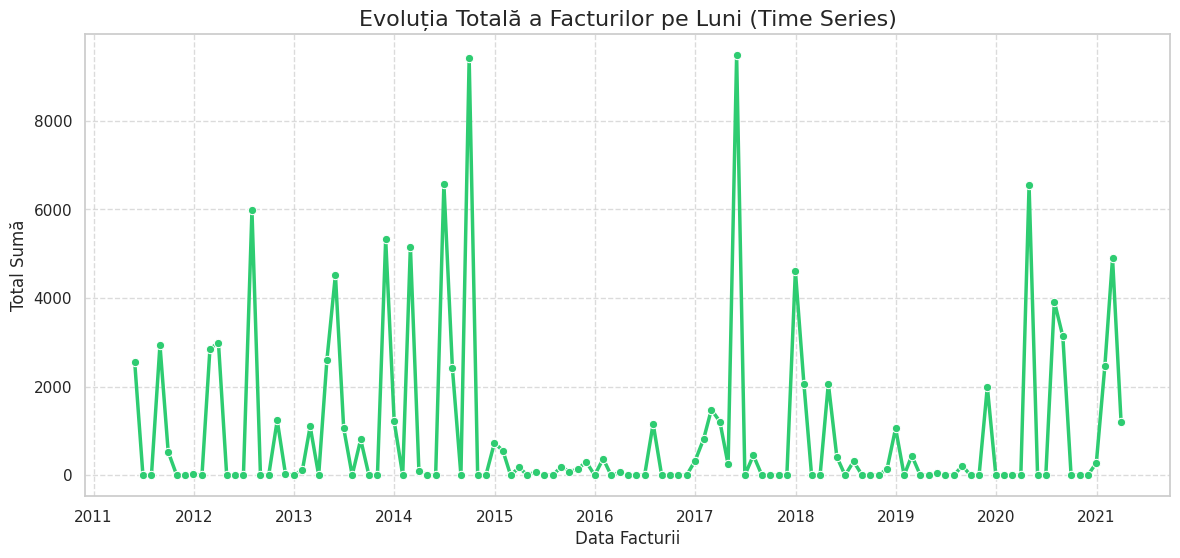

ANALIZA 2: Top cei mai scumpi furnizori
🏆 Top 5 cei mai scumpi furnizori (în medie per factură):
                            mean  count
seller_name                            
Palmer Ltd               9412.91      1
Sim's Oell               9256.99      1
Michael Farrell and Lee  6573.63      1
Torres Group             4901.67      1
Holmes-Whitney           4785.62      1


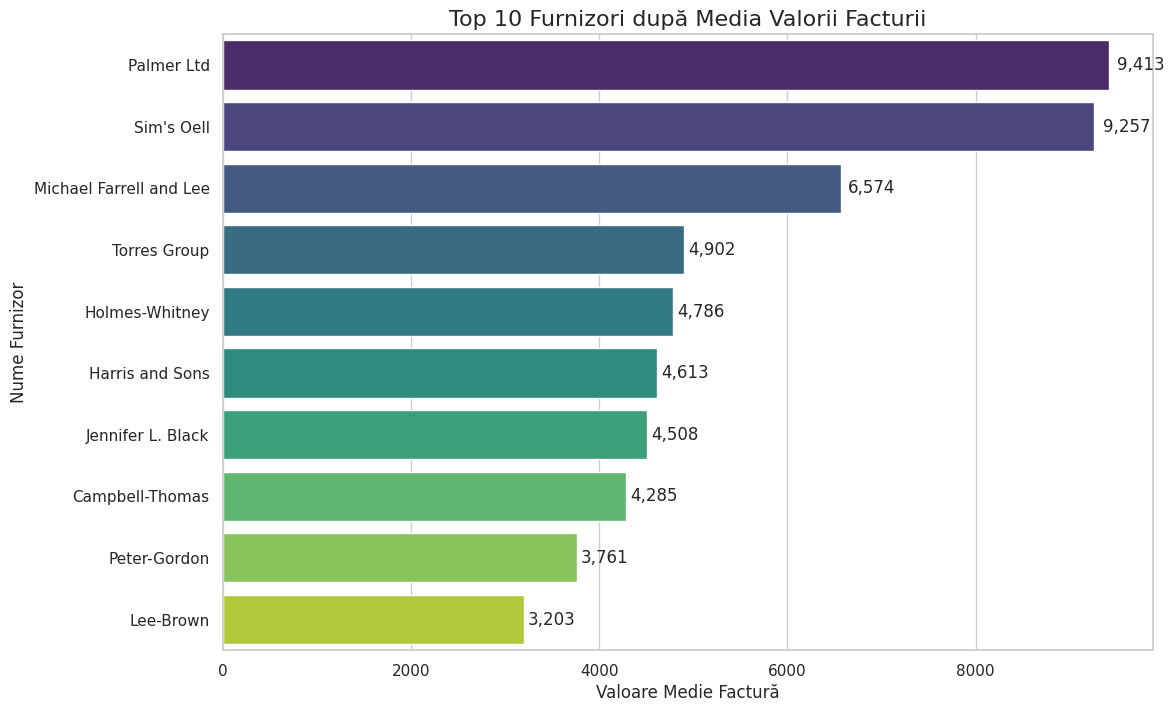

In [28]:
run_eda_pipeline(dataset)

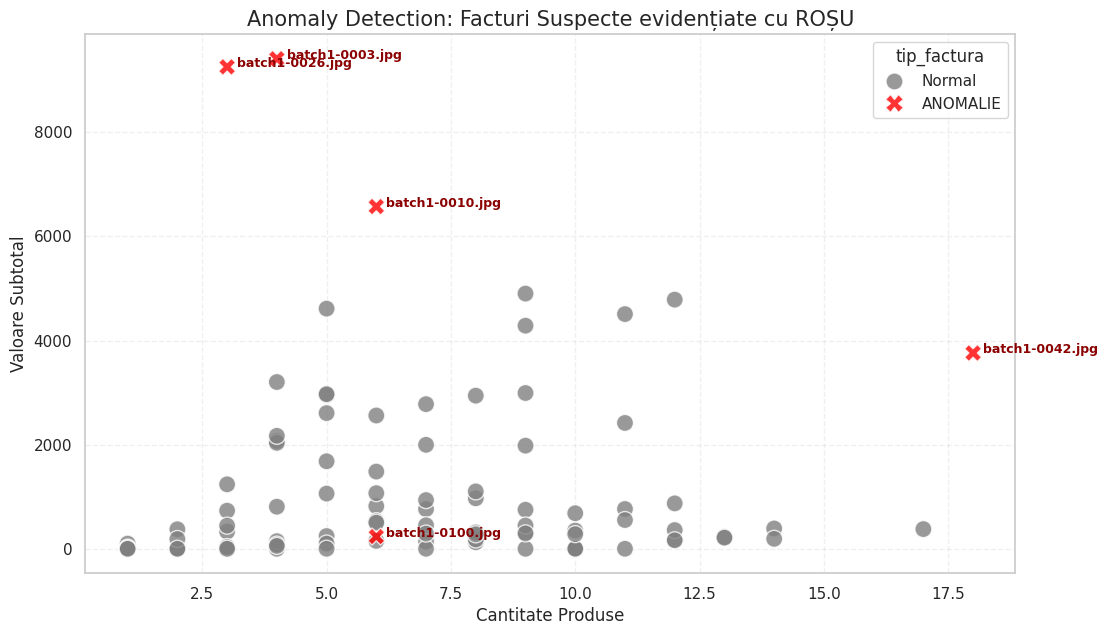


🚨 LISTA FINALĂ A ANOMALIILOR DETECTATE:


,file_name,seller_name,subtotal_amount,subtotal_gross_total,total_items_quantity,tax_rate
2,batch1-0003.jpg,Palmer Ltd,7845.13,9412.91,4.0,16.655636
8,batch1-0010.jpg,Michael Farrell and Lee,5975.75,6573.63,6.0,9.094671
24,batch1-0026.jpg,Sim's Oell,8415.00,9256.99,3.0,9.090536
40,batch1-0042.jpg,Peter-Gordon,3133.80,3760.56,18.0,16.666667
98,batch1-0100.jpg,Brown-Taylor,151.50,234.11,6.0,95.045064


In [26]:
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

# Clean data: drop rows with missing target or month
df_clean = dataset.dropna(subset=['subtotal_amount', 'invoice_month']).copy()


# 1. Selectăm datele pe care a cautaanomalii
# Combinăm Suma + Cantitatea + Taxa pentru a găsi tipare ciudate
features_anomalie = ['subtotal_amount', 'subtotal_gross_total','total_items_quantity', 'tax_rate']
X = df_clean[features_anomalie].dropna()

# 2. Antrenăm modelul "Isolation Forest"
# contamination=0.05 înseamnă că estimăm că ~5% din date sunt erori/fraudă
iso_model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Facem predicția: -1 este Anomalie, 1 este Normal
df_clean.loc[X.index, 'anomaly_score'] = iso_model.fit_predict(X)
df_clean['tip_factura'] = df_clean['anomaly_score'].apply(lambda x: 'ANOMALIE' if x == -1 else 'Normal')

# 3. VIZUALIZARE (HIGHLIGHT)
plt.figure(figsize=(12, 7))

# Folosim un Scatter Plot colorat specific
sns.scatterplot(
    data=df_clean,
    x='total_items_quantity',
    y='subtotal_gross_total',
    hue='tip_factura',       # Colorează diferit anomaliile
    palette={'Normal': 'grey', 'ANOMALIE': 'red'}, # Roșu aprins pentru anomalii
    style='tip_factura',
    s=150,                   # Mărimea punctelor
    alpha=0.8
)

plt.title('Anomaly Detection: Facturi Suspecte evidențiate cu ROȘU', fontsize=15)
plt.xlabel('Cantitate Produse')
plt.ylabel('Valoare Subtotal')
plt.grid(True, linestyle='--', alpha=0.3)

# Adăugăm etichete text doar pentru anomalii (ca să știi ce fișiere sunt)
anomalies = df_clean[df_clean['tip_factura'] == 'ANOMALIE']
for i, row in anomalies.iterrows():
    plt.text(
        row['total_items_quantity']+0.2,
        row['subtotal_gross_total'],
        row['file_name'],
        fontsize=9,
        color='darkred',
        fontweight='bold'
    )

plt.show()

# 4. Afișare tabel
print("\n🚨 LISTA FINALĂ A ANOMALIILOR DETECTATE:")
display(anomalies[['file_name', 'seller_name', 'subtotal_amount', 'subtotal_gross_total','total_items_quantity', 'tax_rate']])

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pentru Machine Learning (Modelare și Evaluare)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Opțional, pentru a ignora avertismentele roșii enervante (warnings)
import warnings
warnings.filterwarnings('ignore')
# 1. Feature Engineering: Season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Clean data: drop rows with missing target or month
df_clean = dataset.dropna(subset=['subtotal_amount', 'invoice_month']).copy()

# Add Season
df_clean['season'] = df_clean['invoice_month'].apply(get_season)

# 2. Seasonality Analysis (Historical)
monthly_stats = df_clean.groupby('invoice_month')['subtotal_amount'].mean()
seasonal_stats = df_clean.groupby('season')['subtotal_amount'].mean()

peak_month = monthly_stats.idxmax()
peak_season = seasonal_stats.idxmax()

print("Peak Month (Historical Mean):", peak_month)
print("Peak Season (Historical Mean):", peak_season)


potential_leaks = ['subtotal_net_total', 'subtotal_gross_total', 'subtotal_total', 'total_items_net_price', 'total_items_net_worth', 'total_items_gross_worth', 'total_items_price']

# Let's use metadata features + time.
features = ['total_items_quantity', 'invoice_month', 'invoice_year', 'invoice_day', 'tax_rate']
# One-hot encode season?
df_model = df_clean.copy()
# Encode season
df_model = pd.get_dummies(df_model, columns=['season'], drop_first=True)

# Update feature list with new season columns
season_cols = [c for c in df_model.columns if 'season_' in c]
features += season_cols

X = df_model[features]
y = df_model['subtotal_amount']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Metrics
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nModel Performance:")
print("MAE:", mae)
print("R2:", r2)
print("\nFeature Importance:")
print(importances)
print("\nSeasonality Data (Month):")
print(monthly_stats)
print("\nSeasonality Data (Season):")
print(seasonal_stats)

Peak Month (Historical Mean): 9
Peak Season (Historical Mean): Autumn

Model Performance:
MAE: 1494.29992
R2: -4.4115672220396025

Feature Importance:
invoice_day             0.241620
tax_rate                0.240200
total_items_quantity    0.198926
invoice_year            0.171038
invoice_month           0.081829
season_Winter           0.027207
season_Summer           0.022053
season_Spring           0.017128
dtype: float64

Seasonality Data (Month):
invoice_month
1      449.851538
2     1502.396000
3      554.121111
4     1508.787143
5     1403.311818
6     1405.740000
7     1364.964000
8      837.516250
9     2098.177500
10     621.195000
11    1103.364286
12     554.149231
Name: subtotal_amount, dtype: float64

Seasonality Data (Season):
season
Autumn    1335.280769
Spring    1147.593704
Summer    1190.368261
Winter     779.888056
Name: subtotal_amount, dtype: float64


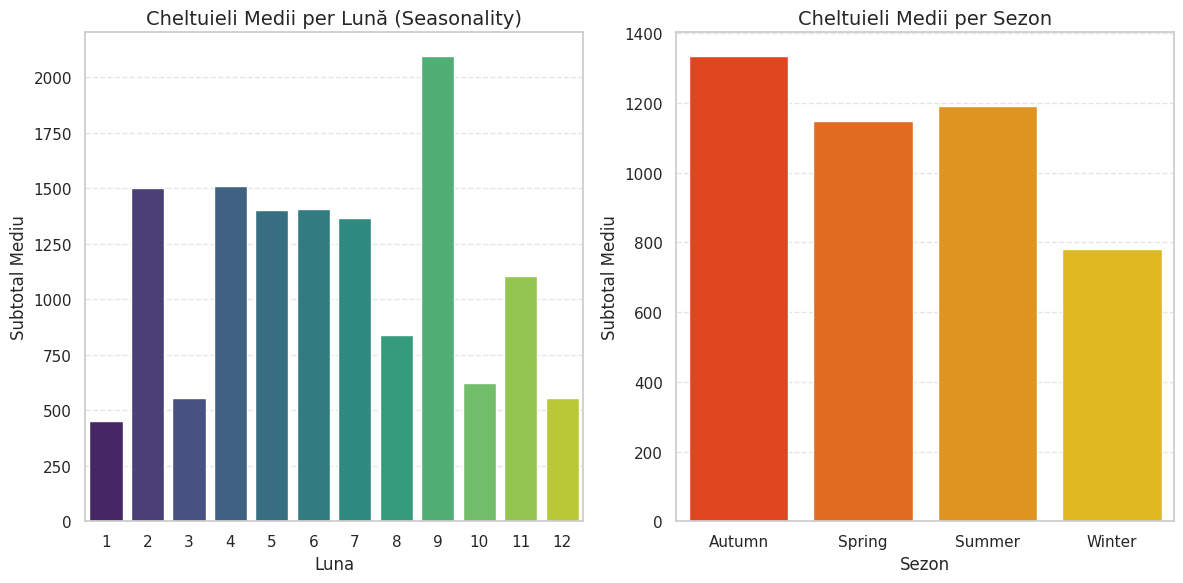

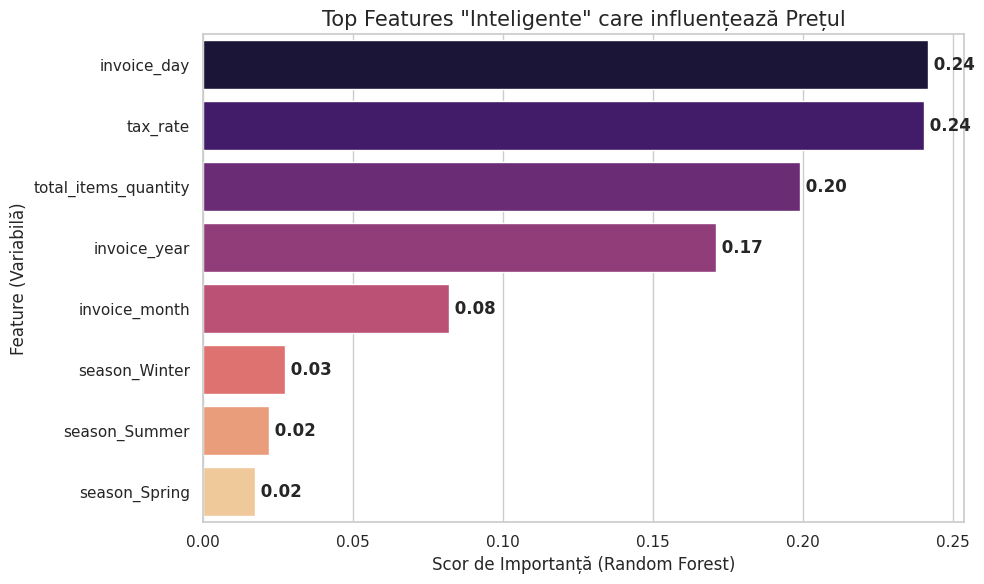

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculăm media pe luni
monthly_stats = df_clean.groupby('invoice_month')['subtotal_amount'].mean()

# Calculăm media pe sezoane
seasonal_stats = df_clean.groupby('season')['subtotal_amount'].mean()

# Extragem importanța (dacă ai modelul 'rf' antrenat deja)
if 'rf' in locals():
    importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
else:
    print("Modelul Random Forest nu este antrenat. Nu pot genera graficul de Feature Importance.")
    importances = pd.Series()


plt.figure(figsize=(12, 6)) # Setăm dimensiunea imaginii

#Graficul 1: Sezonalitate Lunară
plt.subplot(1, 2, 1) # 1 rând, 2 coloane, graficul nr. 1
sns.barplot(x=monthly_stats.index, y=monthly_stats.values, palette='viridis')
plt.title('Cheltuieli Medii per Lună (Seasonality)', fontsize=14)
plt.xlabel('Luna', fontsize=12)
plt.ylabel('Subtotal Mediu', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Graficul 2: Sezonalitate pe Sezoane
plt.subplot(1, 2, 2) # 1 rând, 2 coloane, graficul nr. 2
sns.barplot(x=seasonal_stats.index, y=seasonal_stats.values, palette='autumn')
plt.title('Cheltuieli Medii per Sezon', fontsize=14)
plt.xlabel('Sezon', fontsize=12)
plt.ylabel('Subtotal Mediu', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout() # Ajustează spațiile automat
plt.show()




if not importances.empty:
    plt.figure(figsize=(10, 6))

    # Folosim barplot orizontal pentru claritate
    sns.barplot(x=importances.values, y=importances.index, palette='magma')

    plt.title('Top Features "Inteligente" care influențează Prețul', fontsize=15)
    plt.xlabel('Scor de Importanță (Random Forest)', fontsize=12)
    plt.ylabel('Feature (Variabilă)', fontsize=12)

    # Adăugăm etichetele cu valori la capătul barelor
    for i, v in enumerate(importances.values):
        plt.text(v, i, f' {v:.2f}', va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()